<a href="https://colab.research.google.com/github/Tanishqk96/Agentic-ai/blob/main/SearchCV_and_clustering(_unsupervised_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset
# Replace the path with your actual file path
df = pd.read_csv('/content/Position_Salaries.csv')
df

# Step 3: Prepare features and target
# Assuming your dataset has columns like 'Feature1', 'Feature2', ..., 'Target'
# Change these column names as per your CSV
X = df.iloc[:,:-1]
y = df["Salary"]

# Step 4: Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define parameter grid for GridSearchCV
param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": [i for i in range(2, 20)]
}

# Step 6: Initialize the model and GridSearchCV
model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [8]:
grid_search.score(x_train, y_train)

0.9938898485339633

In [9]:
grid_search.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'splitter': 'random'}

In [10]:
model = DecisionTreeRegressor(criterion="absolute_error", max_depth=3, splitter="random")
grid_search1 = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search1.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeRegressor(criterion='absolute_error',
                                             max_depth=3, splitter='random'),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [11]:
grid_search1.score(x_train, y_train)

0.9964475863569554

In [12]:
grid_search1.best_score_

np.float64(0.512699578959264)

***RANDOMIZED SEARCH CV***

In [20]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [27]:
model1 = DecisionTreeRegressor(criterion="absolute_error", max_depth=5, splitter="random")
rs= RandomizedSearchCV(estimator=model1, param_distributions=param_grid , n_iter=3)
rs.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


RandomizedSearchCV(estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                   max_depth=5,
                                                   splitter='random'),
                   n_iter=3,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [28]:
rs.best_params_

{'splitter': 'random', 'max_depth': 10, 'criterion': 'squared_error'}

In [29]:
rs.best_score_

np.float64(nan)

In [30]:
rs.score(x_train, y_train)

1.0

***Kmeans clustering***

In [31]:
dt = pd.read_csv('/content/iris_no_species.csv')

In [32]:
dt

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

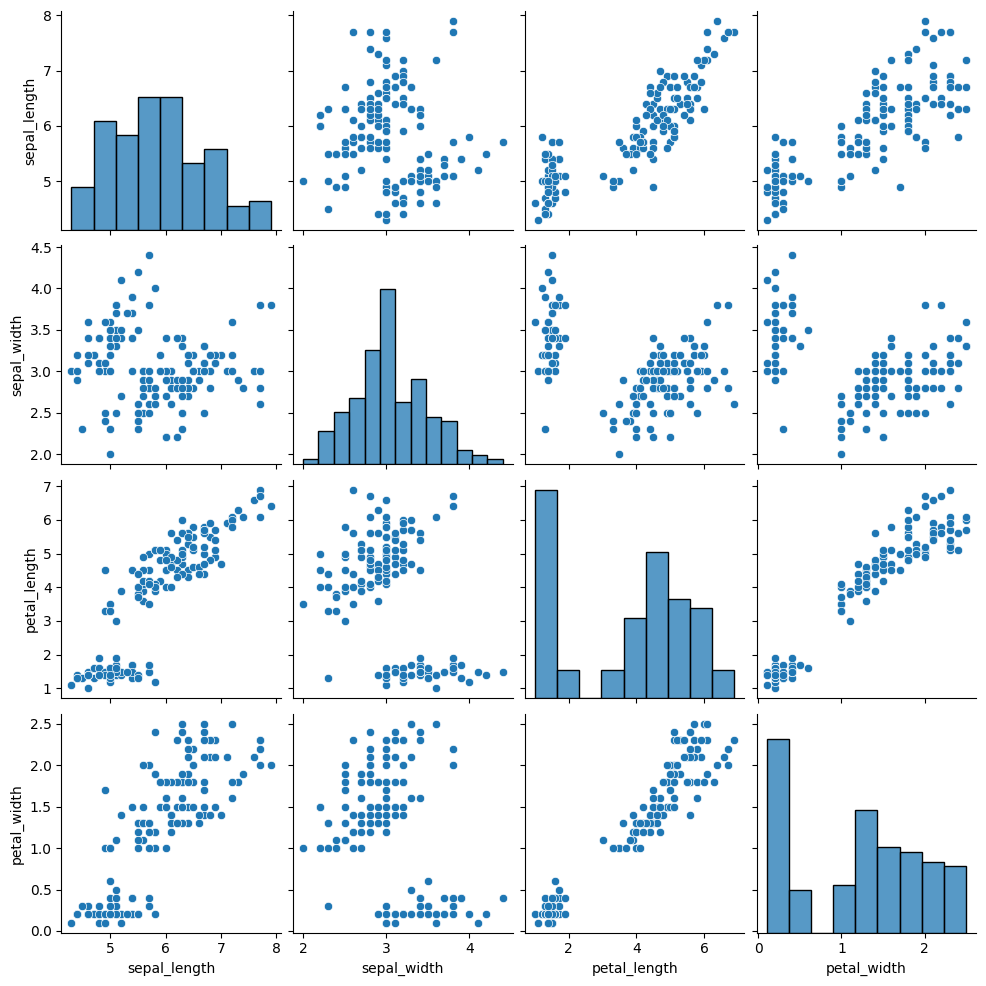

In [36]:
sns.pairplot(data=dt)
plt.show()

In [37]:
from sklearn.cluster import KMeans

In [38]:
wcss=[]

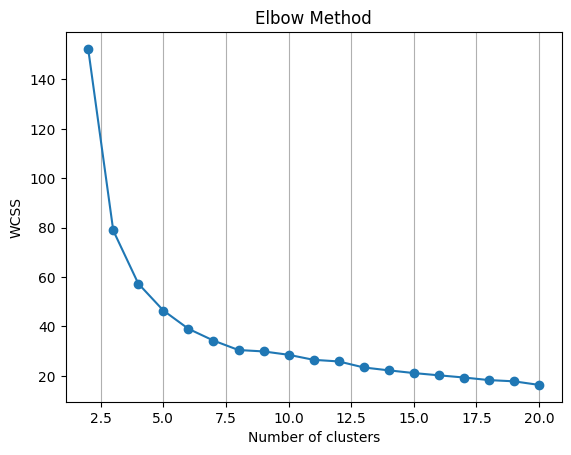

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dt)  # make sure `data` is defined (like Iris or other DataFrame)
    wcss.append(kmeans.inertia_)

plt.plot([i for i in range(2, 21)], wcss, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(axis="x")
plt.show()


In [57]:
kmn = KMeans(n_clusters=3)
dt["predict"]=kmn.fit_predict(dt)

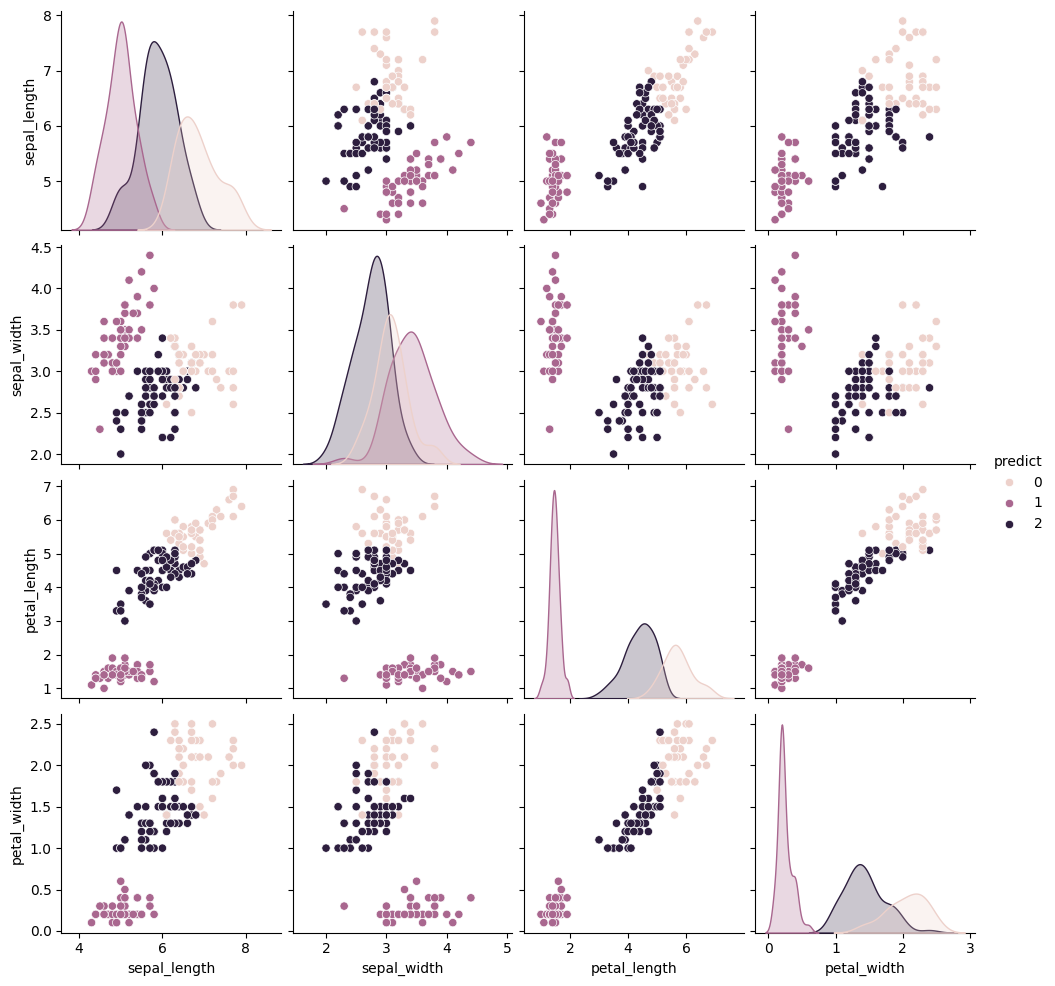

In [59]:
sns.pairplot(data=dt, hue="predict")
plt.show()

***ALGORMERTAIVE CLUSTERING***

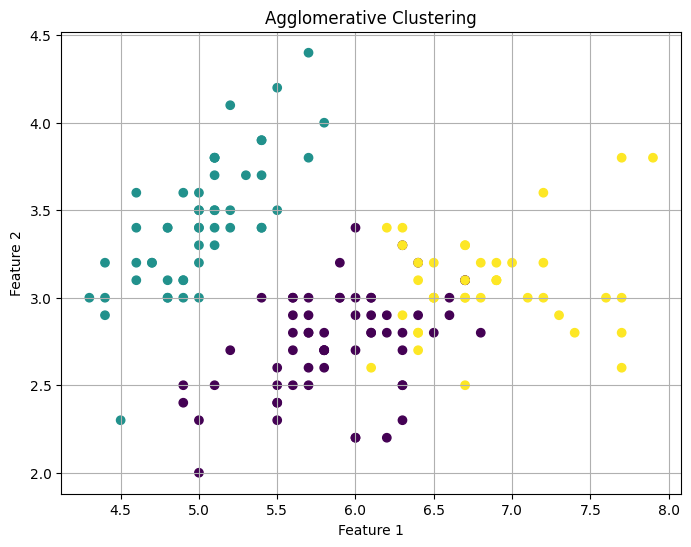

In [60]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Fit Agglomerative Clustering with n_clusters=3
agg = AgglomerativeClustering(n_clusters=3)
dt["predict"] = agg.fit_predict(dt)

# Step 2: (Optional) Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(dt.iloc[:, 0], dt.iloc[:, 1], c=dt["predict"], cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering")
plt.grid(True)
plt.show()


***DB CLUSTERING***

In [65]:
from sklearn.datasets import make_moons
import pandas as pd

In [62]:
x,y= make_moons(n_samples=200, noise=0.07)

In [76]:
df= {"data1":x[:,0], "data2":x[:,1]}

In [71]:
dataset = pd.DataFrame(df)

In [72]:
dataset.head()

,data1,data2,output
0,1.119455,-0.479940,1
1,1.109124,0.306830,0
2,0.018295,0.296041,1
3,0.013638,1.082354,0
4,1.677952,-0.253080,1


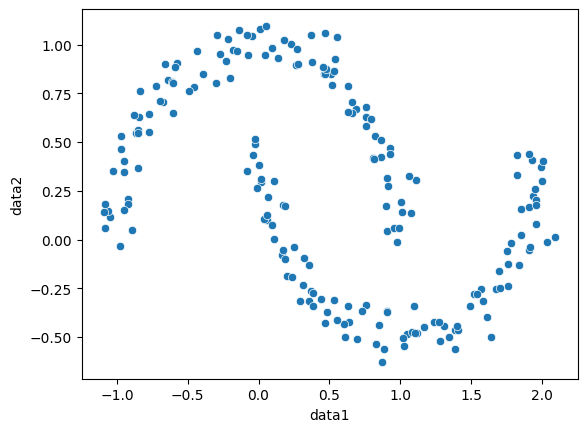

In [77]:
sns.scatterplot(x="data1", y="data2" , data=dataset)
plt.show()

In [75]:
from sklearn.cluster import DBSCAN

In [78]:
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

In [81]:
dataset["prediction"]=db.fit_predict(dataset)

<Axes: xlabel='data1', ylabel='data2'>

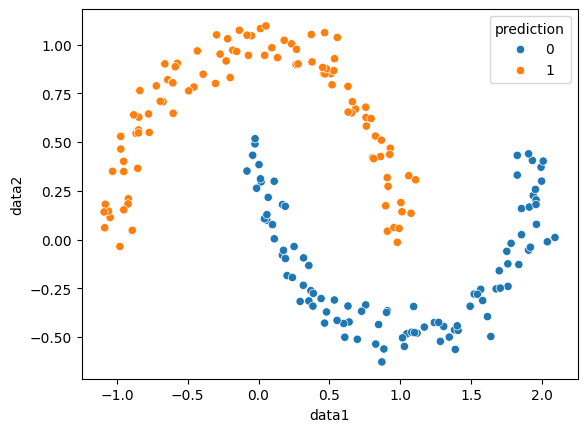

In [82]:
sns.scatterplot(x="data1", y="data2" , data=dataset, hue="prediction")

<Axes: xlabel='data1', ylabel='data2'>

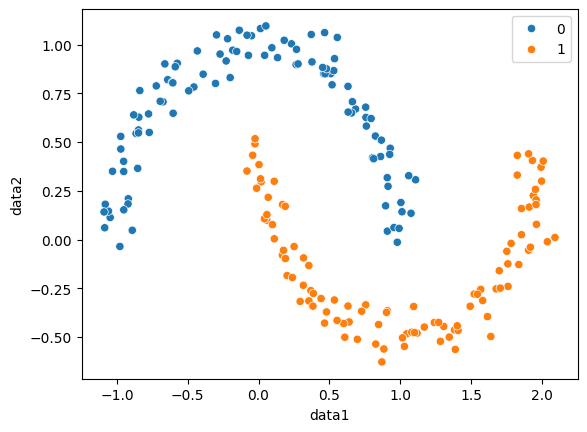

In [84]:
sns.scatterplot(x="data1", y="data2" , data=dataset, hue=y)